In [1]:
import numpy as np

from scipy import stats, optimize

from matplotlib import pyplot as plt
%matplotlib inline

array([2.   , 3.63 , 6.   , 4.   , 2.   , 2.833, 4.   , 2.   , 2.   ,
       3.   , 3.   , 3.   , 2.   , 2.   ])

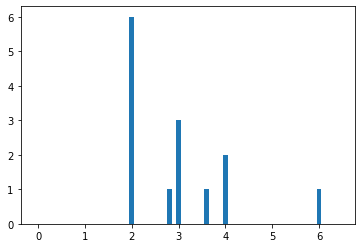

In [2]:
# From the results of the survey

# lesson 1: if you can, force validation of inputs upon your users 😜

data = """2
3.63
6
4
2
2.833

4
2
2
3
3
3
2
2"""

# conert to a float array
data = np.array([float(line) for line in data.split('\n') if line.strip()])
plt.hist(data, bins=(np.arange(66)-.5)/10);
data

Bayes: $P(\theta|\textbf{D}) = P(\theta ) \frac{P(\textbf{D} |\theta)}{P(\textbf{D})}$

$P(D_i |\theta) = Poisson(x_i, \lambda)$

Prior U(0, 7)

In [3]:
ngrid = np.arange(10)
interpolated_pmf = lambda data, rate: np.interp(data, ngrid, stats.poisson.pmf(ngrid, rate))
interpolated_pmf(data, 2)

array([0.27067057, 0.12360623, 0.0120298 , 0.09022352, 0.27067057,
       0.19551437, 0.09022352, 0.27067057, 0.27067057, 0.18044704,
       0.18044704, 0.18044704, 0.27067057, 0.27067057])

array([2.95629725])

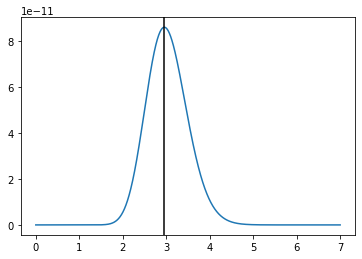

In [4]:
rates  = np.linspace(0, 7, 2500)

plt.plot(rates, [np.prod(interpolated_pmf(data, rate)) for rate in rates], '-')

best = optimize.minimize(lambda ps: -np.log(np.prod(interpolated_pmf(data, ps[0]))), 3).x
plt.axvline(best, c='k')
best

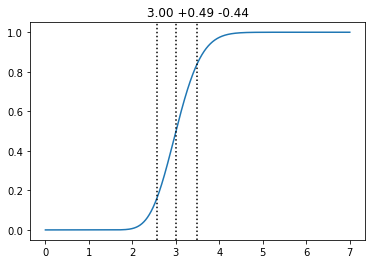

In [5]:
cdf = np.cumsum([np.prod(interpolated_pmf(data, rate)) for rate in rates])
cdf /= cdf[-1]

plt.plot(rates, cdf)

def find_cdf_level(level):
    return optimize.minimize(lambda ps: (np.interp(ps[0], rates, cdf) - level)**2, 3).x[0]

levels = find_cdf_level(.5), find_cdf_level(.5-.341), find_cdf_level(.5+.341) # "one sigma"
for l in levels:
    plt.axvline(l, c='k', ls=':')
plt.title('{0:.2f} +{1:.2f} -{2:.2f}'.format(levels[0], levels[2]-levels[0], levels[0]-levels[1]));

What if I really think we need 4?

In [6]:
# gaussian prior centered on 4
rate_prior = stats.norm(loc=4, scale=1)

ngrid = np.arange(10)
interpolated_pmf = lambda data, rate: np.interp(data, ngrid, rate_prior.pdf(rate)*stats.poisson.pmf(ngrid, rate))

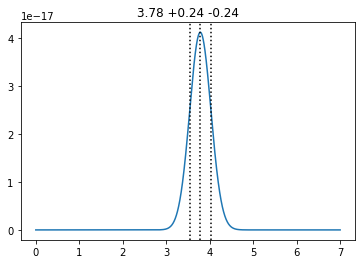

In [7]:
plt.plot(rates, [np.prod(interpolated_pmf(data, rate)) for rate in rates], '-')

cdf = np.cumsum([np.prod(interpolated_pmf(data, rate)) for rate in rates])
cdf /= cdf[-1]
def find_cdf_level(level):
    return optimize.minimize(lambda ps: (np.interp(ps[0], rates, cdf) - level)**2, 3).x[0]
levels = find_cdf_level(.5), find_cdf_level(.5-.341), find_cdf_level(.5+.341) # "one sigma"
for l in levels:
    plt.axvline(l, c='k', ls=':')
plt.title('{0:.2f} +{1:.2f} -{2:.2f}'.format(levels[0], levels[2]-levels[0], levels[0]-levels[1]));

In [8]:
# gaussian prior centered on 4 but wider
rate_prior = stats.norm(loc=4, scale=3)

ngrid = np.arange(10)
interpolated_pmf = lambda data, rate: np.interp(data, ngrid, rate_prior.pdf(rate)*stats.poisson.pmf(ngrid, rate))

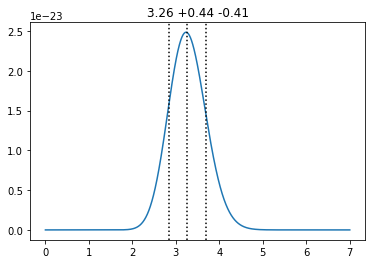

In [9]:
plt.plot(rates, [np.prod(interpolated_pmf(data, rate)) for rate in rates], '-')

cdf = np.cumsum([np.prod(interpolated_pmf(data, rate)) for rate in rates])
cdf /= cdf[-1]
def find_cdf_level(level):
    return optimize.minimize(lambda ps: (np.interp(ps[0], rates, cdf) - level)**2, 3).x[0]
levels = find_cdf_level(.5), find_cdf_level(.5-.341), find_cdf_level(.5+.341) # "one sigma"
for l in levels:
    plt.axvline(l, c='k', ls=':')
plt.title('{0:.2f} +{1:.2f} -{2:.2f}'.format(levels[0], levels[2]-levels[0], levels[0]-levels[1]));

In conclusion: Unless I *really* think 4 are necessary, we should have 3.